# PyTorch to implement deep learning neural network using MNIST dataset for digit classification

In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [18]:
# Device configuration
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
# Using parameters train the neural network
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [20]:
train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform=transforms.ToTensor(), download=True)

In [21]:
test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform = transforms.ToTensor())

In [22]:
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [23]:
print(test_dataset)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [24]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

In [25]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [29]:
for samples, labels in train_loader:
    print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

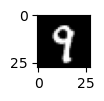

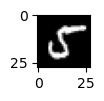

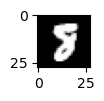

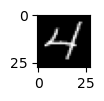

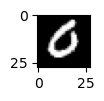

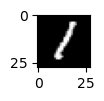

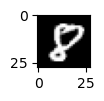

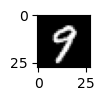

In [32]:
import matplotlib.pyplot as plt
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.show()

In [42]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [43]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [45]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1)%100 == 0:
            print(f'epoch{epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss={loss.item():4f}')
            
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
                    
        _,predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
                    
    acc = 100.0*n_correct/n_samples
    print(f'accuracy={acc}')

epoch1/2, step100/600, loss=0.507356
epoch1/2, step200/600, loss=0.401659
epoch1/2, step300/600, loss=0.314022
epoch1/2, step400/600, loss=0.348017
epoch1/2, step500/600, loss=0.194227
epoch1/2, step600/600, loss=0.311448
epoch2/2, step100/600, loss=0.130792
epoch2/2, step200/600, loss=0.187237
epoch2/2, step300/600, loss=0.225840
epoch2/2, step400/600, loss=0.222768
epoch2/2, step500/600, loss=0.235648
epoch2/2, step600/600, loss=0.251169
accuracy=95.3
